# Basic characteristics

## Importing graphs

In [2]:
!pip install networkx
import networkx as nx

In [222]:
SNet = nx.read_gml("data/graphs/snet.gml")
SNetF = nx.read_gml("data/graphs/snetf.gml")
SNetT = nx.read_gml("data/graphs/snett.gml")
UserNet = nx.read_gml("data/graphs/usernet.gml")

In [223]:
print(nx.info(SNet))
print(nx.info(SNetF))
print(nx.info(SNetT))
print(nx.info(UserNet))

Name: 
Type: Graph
Number of nodes: 4191
Number of edges: 135974
Average degree:  64.8886
Name: 
Type: Graph
Number of nodes: 4191
Number of edges: 6113
Average degree:   2.9172
Name: 
Type: Graph
Number of nodes: 39
Number of edges: 741
Average degree:  38.0000
Name: 
Type: DiGraph
Number of nodes: 18975
Number of edges: 102043
Average in degree:   5.3778
Average out degree:   5.3778


##  [Gephi tool](www.gephi.org) shared code for import

Shared code markdown for better reusability

In [217]:
from IPython.display import Markdown as md
import codecs

def show_graph_model(path):
    display(md(f"<img src='{path}model.png' alt='model' width='500'/>"))

def show_density_report(path):
    density_report_path="density-report/report.html"
    with open(path + density_report_path, "r", encoding='utf-8') as f:
        text= f.read()
        display(md(text)) 
        
def show_distance_report(path):
    distance_report_path="distance-report/report.html"
    with open(path + distance_report_path, "r", encoding='utf-8') as f:
        text= f.read()
        display(md(text)) 

## General python shared code

In [117]:
def clustering(graph, weight="None"):
    average_clustering = nx.average_clustering(graph, weight=weight)
    clustering_coefficient = [coefficient for coefficient in nx.clustering(graph, weight=weight).values() if coefficient > 0]
    global_clustering = max(clustering_coefficient)
    return average_clustering, global_clustering, clustering_coefficient

In [170]:
def create_erdos_renyi(graph, directed):
    n = graph.number_of_nodes()
    m = graph.number_of_edges()
    p = (2 * float(m)) / (n * (n - 1))
    return nx.erdos_renyi_graph(n, p, directed=directed)

In [173]:
def print_clustering_coeffs(name, average_clustering, global_clustering):
    print(f"--------------------------\t{name}'s \t--------------------------")
    print(f"Average clustering coefficient: {round(average_clustering, 6)}")
    print(f"Global clustering coefficient:  {round(global_clustering, 6)}")
    print()
    
def group_prints(g_name, g_tuple_w, g_tuple_nw, er_tuple):
    print_clustering_coeffs(f"{g_name} weighted", g_tuple_w[0], g_tuple_w[1])
    print_clustering_coeffs(f"{g_name} not-weighted", g_tuple_nw[0], g_tuple_nw[1])
    print_clustering_coeffs("Erdos-Renyi", er_tuple[0], er_tuple[1])

In [105]:
import matplotlib.pyplot as plt

def draw_versus_er_histograms(g_name, g_cc, er_cc):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f"{g_name} vs Erdos-Renyi clustering")
    ax1.hist(g_cc, bins=50)
    ax2.hist(er_cc, bins=50)

# SNet

In [9]:
print(nx.info(SNet))

Name: 
Type: Graph
Number of nodes: 4191
Number of edges: 135974
Average degree:  64.8886


</HTML><img src="data/gephi/SNet/model.png" alt="model" width="500"/>

## 7 Graph density

<HTML> <BODY> <h3>Graph Density  Report - Results:</h3> <hr>Density: <b>0.015</b><br />

## 8 Avrage Distance in graph & The diameter

<HTML> <BODY> <h3>Graph Distance  Report - Results:</h3> <hr>Diameter: <b>5</b><br />Radius: <b>0</b><br />Average Path length: <b>2.1072775194289464</b><br />
    <table>
  <tr>
    <td><IMG SRC="data/gephi/SNet/distance-report/Betweenness Centrality Distribution.png" WIDTH="600" HEIGHT="400" BORDER="0" USEMAP="#chart"></IMG></td>
    <td><IMG SRC="data/gephi/SNet/distance-report/Closeness Centrality Distribution.png" WIDTH="600" HEIGHT="400" BORDER="0" USEMAP="#chart"></IMG></td>
  </tr>
  <tr>
    <td><IMG SRC="data/gephi/SNet/distance-report/Eccentricity Distribution.png" WIDTH="600" HEIGHT="400" BORDER="0" USEMAP="#chart"></IMG></td>
    <td><IMG SRC="data/gephi/SNet/distance-report/Harmonic Closeness Centrality Distribution.png" WIDTH="600" HEIGHT="400" BORDER="0" USEMAP="#chart"></IMG></td>
  </tr>
</table>

## 9 Connectivity

<HTML>
    <BODY> 
        <h3>Connected Components Report - Results:</h3>
        Number of Weakly Connected Components: <b>799</b><br/>
        There is <b>1</b> Gigantic component - The core is the largest part of the graph
        <table>
            <tr>
                <td><IMG SRC="data/gephi/SNet/model.png" WIDTH="300" HEIGHT="300" BORDER="0" USEMAP="#chart"></IMG></td>
                <td><IMG SRC="data/gephi/SNet/connected-components-report/cc-size-distribution.png" WIDTH="480" HEIGHT="320" BORDER="0" USEMAP="#chart"></IMG></td>
            </tr>
        </table>
        </BODY></HTML>

## 10 Average, Global and Local Clusterization

<HTML> <BODY> <h3> Clustering Coefficient Metric Report - Result: </h3> <hr>Average Clustering Coefficient: <b>0.907</b><br />Total triangles: <b>6598248</b><br />The Average Clustering Coefficient is the mean value of individual coefficients.<br /><br /><IMG SRC="data\gephi\SNet\clustering-coefficient-metric-report\clustering-coefficient.png" WIDTH="480" HEIGHT="320" BORDER="0" USEMAP="#chart"></IMG></BODY> </HTML>

In [118]:
snet_clustering_tuple_w = clustering(SNet, "weight")

In [119]:
snet_clustering_tuple = clustering(SNet)

In [171]:
er_snet = create_erdos_renyi(SNet, directed=False)
er_snet_clustering_tuple = clustering(er_snet)

In [220]:
group_prints("SNet", snet_clustering_tuple_w, snet_clustering_tuple, er_snet_clustering_tuple)

--------------------------	SNet weighted's 	--------------------------
Average clustering coefficient: 0.000247
Global clustering coefficient:  0.001219

--------------------------	SNet not-weighted's 	--------------------------
Average clustering coefficient: 0.618428
Global clustering coefficient:  1.0

--------------------------	Erdos-Renyi's 	--------------------------
Average clustering coefficient: 0.015529
Global clustering coefficient:  0.027869



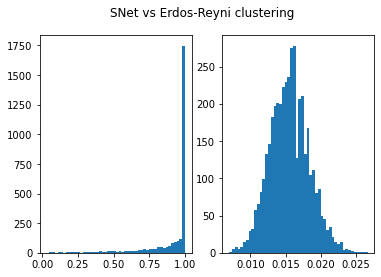

In [169]:
draw_versus_er_histograms("SNet", snet_clustering_tuple[2], er_snet_clustering_tuple[2])

We can observe that there is a lot of well connected nodes - most of them are at 1.

We can conclude that there is in fact a **pronounced clusterization** - one big cluster

## Graph analysis

I'm going to write functions in order to avoid code duplication. Aftwer these methods, I will write the answers seperated by networks

In [126]:
graph_names = ["SNet", "SnetF", "SnetT", "UserNet"]
graphs = [SNet, SNetF, SNetT, UserNet]

graph_to_name = list(zip(graphs, graph_names))